# Multi-Class Supervised Classification problem


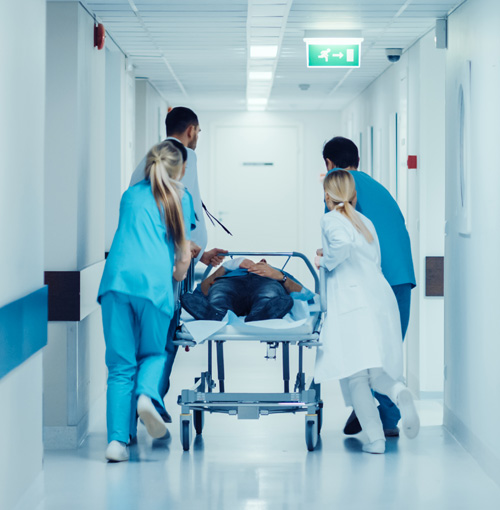

#### Recent NHS report stated that more than 30% of people admitted to hospital from A&E(Accident and Emergency) had to wait over 4 hours for a bed or for treatment, and NHS continues to see a unprecedented demand for the same.

The aim of the project is : To help hospitals plan their A&E department to provide better healthcare services to potential casualty patients, by predicting if an incoming accident patient needs immediate attention or not, based on severity (fatal, serious or slight).

Possible Predictor variables list : accident_severity, number_of_casualties, sex_of_casualty, age_band_of_casualty, casualty_type, latitude, longitude, day_of_week, time, casualty_class.

Target Variable : casualty_severity

Datasets of interest: Road Casualty Statistics 2020 and Road Accident Statistics 2020

In [1]:
#import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
from sklearn.model_selection import StratifiedShuffleSplit
import warnings

Essential libraries have been imported

# Step 1. Load Data

In [2]:
#ignoring warnings
warnings.simplefilter("ignore")

#read the casualty file
url_cas = "https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-casualty-2020.csv"
dataFrameCasualties = pd.read_csv(url_cas)
dataFrameCasualties.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3


The casualty dataset has 18 variable columns

In [3]:
#read the accident file
url_acc = "https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-accident-2020.csv"
dataFrameAccident = pd.read_csv(url_acc)
dataFrameAccident.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


The accident dataset has 36 variable columns

In [4]:
#get generic info on the casualty dataframe
dataFrameCasualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      115584 non-null  object
 1   accident_year                       115584 non-null  int64 
 2   accident_reference                  115584 non-null  object
 3   vehicle_reference                   115584 non-null  int64 
 4   casualty_reference                  115584 non-null  int64 
 5   casualty_class                      115584 non-null  int64 
 6   sex_of_casualty                     115584 non-null  int64 
 7   age_of_casualty                     115584 non-null  int64 
 8   age_band_of_casualty                115584 non-null  int64 
 9   casualty_severity                   115584 non-null  int64 
 10  pedestrian_location                 115584 non-null  int64 
 11  pedestrian_movement                 115

The casualty dataframe has 115584 rows of data of which 16 of the variables are numerical data and 2 are object variables

In [5]:
#get generic info on the accident dataframe
dataFrameAccident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

The accident dataframe has 91199 rows of data of which 25 of the variables are numerical data, 4 are float and 7 are object variables

In [6]:
#merge both dataframes into one
merged_df = dataFrameCasualties.merge(dataFrameAccident,
                                              how="inner",
                                              on="accident_index",
                                              suffixes= ('_cas', '_acc'))

print(merged_df.shape)

merged_df.columns

(96589, 53)


Index(['accident_index', 'accident_year_cas', 'accident_reference_cas',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'accident_year_acc',
       'accident_reference_acc', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_cross

The merged_df dataframe has 53 column variables with 96589 records 

In [7]:
#dropping columns that does not seem relevant to the business problem
merged_df.drop([
    "accident_index", "accident_reference_cas", "vehicle_reference",
    "casualty_reference", "accident_year_acc", "accident_reference_acc",
    "location_easting_osgr", "location_northing_osgr", "number_of_vehicles",
    "local_authority_district", "local_authority_ons_district","weather_conditions",
    "local_authority_highway", "first_road_class", "first_road_number",
    "road_type", "speed_limit", "junction_detail", "junction_control",
    "second_road_class", "second_road_number","accident_year_cas",
    "pedestrian_crossing_human_control","casualty_imd_decile",
    "pedestrian_crossing_physical_facilities", "light_conditions",
    "road_surface_conditions", "special_conditions_at_site","bus_or_coach_passenger",
    "carriageway_hazards", "urban_or_rural_area", "trunk_road_flag",
    "lsoa_of_accident_location", "pedestrian_road_maintenance_worker",
    "car_passenger", "pedestrian_road_maintenance_worker", "pedestrian_location", 
    "pedestrian_movement"
],
               axis=1,
               inplace=True)

merged_df.shape
merged_df.columns

Index(['casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'casualty_type',
       'casualty_home_area_type', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'did_police_officer_attend_scene_of_accident'],
      dtype='object')

The merged_df dataframe now has 16 columns for further exploration and analysis

# Step 2. Data Splitting

In [8]:
'''split imbalanced dataset into stratified train-test with 
80% training and 20% testing data'''
stratified_splitter = StratifiedShuffleSplit(n_splits=1,
                                             test_size=0.2,
                                             random_state=5)

train_index, test_index = list(
    stratified_splitter.split(merged_df, merged_df["casualty_severity"]))[0]

trainset = merged_df.loc[train_index]

testset = merged_df.loc[test_index]

In [9]:
#check the distribution in training set
trainset["casualty_severity"].value_counts(normalize=True)

3    0.801103
2    0.184623
1    0.014274
Name: casualty_severity, dtype: float64

In [10]:
#check if the distribution of the variable is similar in test set
testset["casualty_severity"].value_counts(normalize=True)

3    0.801066
2    0.184646
1    0.014287
Name: casualty_severity, dtype: float64

In [11]:
print(f"There are {trainset.shape[0]} training and {testset.shape[0]} test instances")

There are 77271 training and 19318 test instances


The distribution between train and test set are quite similar.

# Step 3. Exploratory Data Analysis

### Distribution of numerical variables

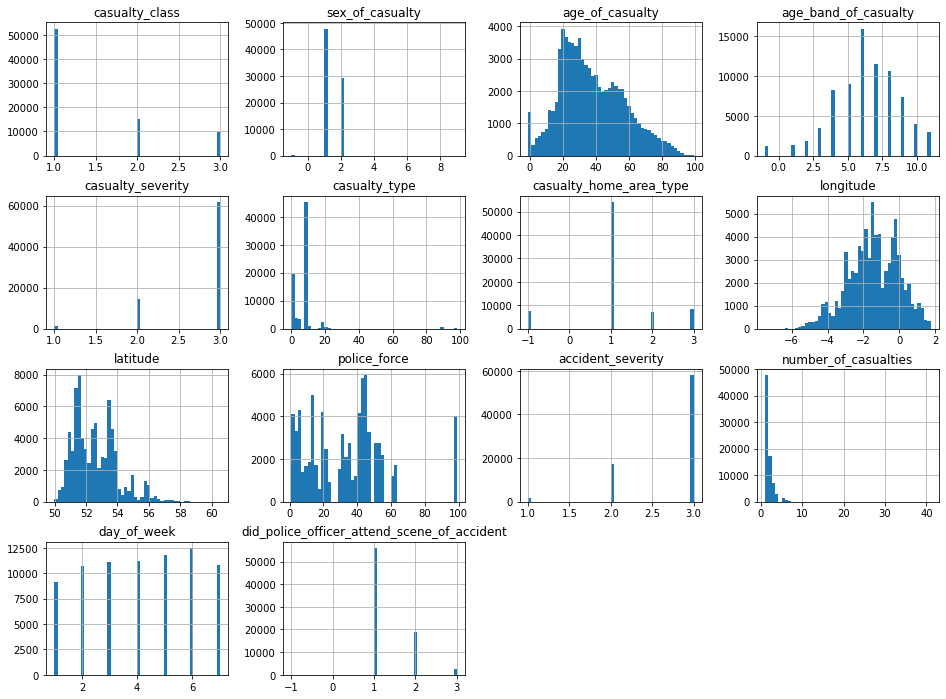

In [12]:
dummy = trainset.hist(bins=50, figsize=(16,12))

*   Highest number of casualty patients have been car occupants.
*   Most casualties have been slight.
*   Men have been the major victims.

### Distribution of categorical variables

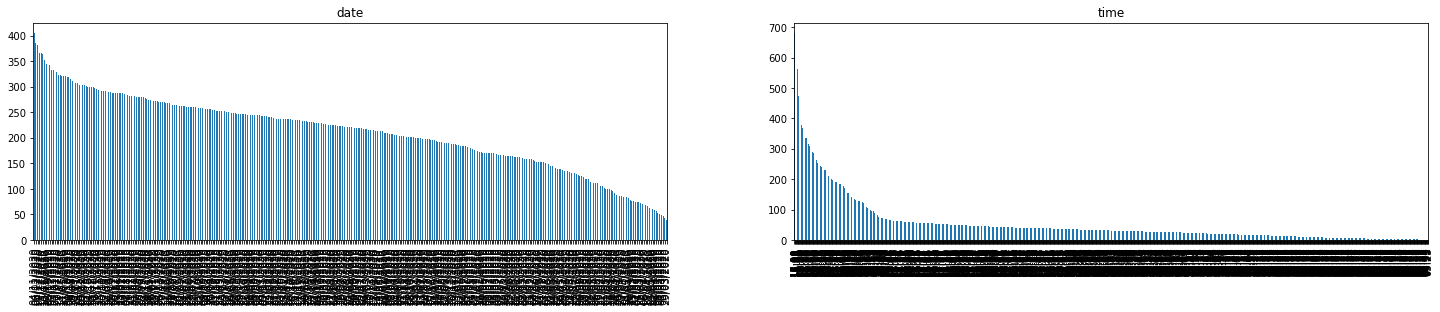

In [13]:
categorical_features = trainset.select_dtypes(include=['object']).columns

fig, ax = plt.subplots(1, len(categorical_features), figsize=(25, 4))
for i, categorical_feature in enumerate(trainset[categorical_features]):
    trainset[categorical_feature].value_counts().plot(
        kind="bar", ax=ax[i]).set_title(categorical_feature)

# Step 4. Data Pre-processing and transformation

### Utility functions

In [14]:
# Configures the graph for title, size, legends
def configureGraph(axis,
                   plot,
                   xLabelTitle,
                   xLabelSize,
                   yLabelTitle,
                   yLabelSize,
                   showGrid,
                   graphTitle,
                   titleSize=20):
    try:
        configureGraphForNonFacets(axis, xLabelTitle, xLabelSize, yLabelTitle,
                                   yLabelSize, graphTitle, titleSize)
    except AttributeError:
        configureGraphForFacets(axis, plot, xLabelTitle, xLabelSize,
                                yLabelTitle, yLabelSize, graphTitle, titleSize)
    if showGrid:
        plot.grid()


# Configures graph for non faceted graph
def configureGraphForNonFacets(axis,
                               xLabelTitle,
                               xLabelSize,
                               yLabelTitle,
                               yLabelSize,
                               graphTitle,
                               titleSize=20):
    axis.set_title(graphTitle, size=titleSize, weight='bold')
    axis.set_xlabel(xLabelTitle, size=xLabelSize)
    axis.set_ylabel(yLabelTitle, size=yLabelSize)


# Configures graph for faceted type
def configureGraphForFacets(axis,
                            plot,
                            xLabelTitle,
                            xLabelSize,
                            yLabelTitle,
                            yLabelSize,
                            graphTitle,
                            titleSize=20):
    axis.set_axis_labels(x_var=xLabelTitle,
                         y_var=yLabelTitle,
                         fontsize=xLabelSize)
    if graphTitle != "":
        plot.title(graphTitle, fontsize=titleSize)


#function that returns the lowerbound and upperbound values using interquartile range(IQR) score
def outlier_detect(data):
    sorted(data)
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [15]:
#drop duplicates in training set
trainset.drop_duplicates(inplace= True)

trainset.shape

(76983, 16)

288 rows of duplicate records have been dropped off from the training set

In [16]:
#drop duplicate records from testset
testset.drop_duplicates()

testset.shape

(19318, 16)

## Handling Missing values

In [17]:
#Checking the percentage of nan values present in each feature
features_with_na = [
    features for features in trainset.columns
    if trainset[features].isnull().sum() > 0
]

#Iterating through each feature and printing feature name and percentage of missing values.
for feature in features_with_na:
    print(feature, np.round(trainset[feature].isnull().mean(), 4),
          '%missing values')

longitude 0.0002 %missing values
latitude 0.0002 %missing values


In [18]:
#Dropping the rows of columns which has nan values using 'dropna' function
trainset.dropna(inplace=True)

testset.dropna(inplace=True)

In [19]:
#Checking for null values in training set
trainset.isnull().sum()

casualty_class                                 0
sex_of_casualty                                0
age_of_casualty                                0
age_band_of_casualty                           0
casualty_severity                              0
casualty_type                                  0
casualty_home_area_type                        0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
did_police_officer_attend_scene_of_accident    0
dtype: int64

In [20]:
#Checking for null values in testset
testset.isnull().sum()

casualty_class                                 0
sex_of_casualty                                0
age_of_casualty                                0
age_band_of_casualty                           0
casualty_severity                              0
casualty_type                                  0
casualty_home_area_type                        0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
did_police_officer_attend_scene_of_accident    0
dtype: int64

No null values present in training or test set

In [21]:
#delete rows with values -1(unknown) and 9(self reported) from variables in training set
values = [-1, 9]
trainset.drop(
    trainset.loc[trainset.sex_of_casualty.isin(values) == True].index,
    inplace=True)
trainset.drop(trainset.loc[trainset['age_band_of_casualty'] == -1].index,
              inplace=True)
trainset.drop(trainset.loc[trainset['casualty_home_area_type'] == -1].index,
              inplace=True)
trainset.drop(trainset.loc[trainset['casualty_type'] == -1].index,
              inplace=True)
trainset.drop(trainset.loc[
    trainset['did_police_officer_attend_scene_of_accident'] == -1].index,
              inplace=True)

In [22]:
#delete rows with values -1(unknown) and 9(self reported) from variables in testset
values = [-1, 9]
testset.drop(testset.loc[testset.sex_of_casualty.isin(values) == True].index,
             inplace=True)
testset.drop(testset.loc[testset['age_band_of_casualty'] == -1].index,
             inplace=True)
testset.drop(testset.loc[testset['casualty_home_area_type'] == -1].index,
             inplace=True)
testset.drop(testset.loc[testset['casualty_type'] == -1].index, inplace=True)
testset.drop(testset.loc[testset['did_police_officer_attend_scene_of_accident']
                         == -1].index,
             inplace=True)

Values of records that are unknown or self reported have been deleted

## Handling outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'casualty_class'),
  Text(2, 0, 'sex_of_casualty'),
  Text(3, 0, 'age_of_casualty'),
  Text(4, 0, 'age_band_of_casualty'),
  Text(5, 0, 'casualty_severity'),
  Text(6, 0, 'casualty_type'),
  Text(7, 0, 'casualty_home_area_type'),
  Text(8, 0, 'longitude'),
  Text(9, 0, 'latitude'),
  Text(10, 0, 'police_force'),
  Text(11, 0, 'accident_severity'),
  Text(12, 0, 'number_of_casualties'),
  Text(13, 0, 'day_of_week'),
  Text(14, 0, 'did_police_officer_attend_scene_of_accident')])

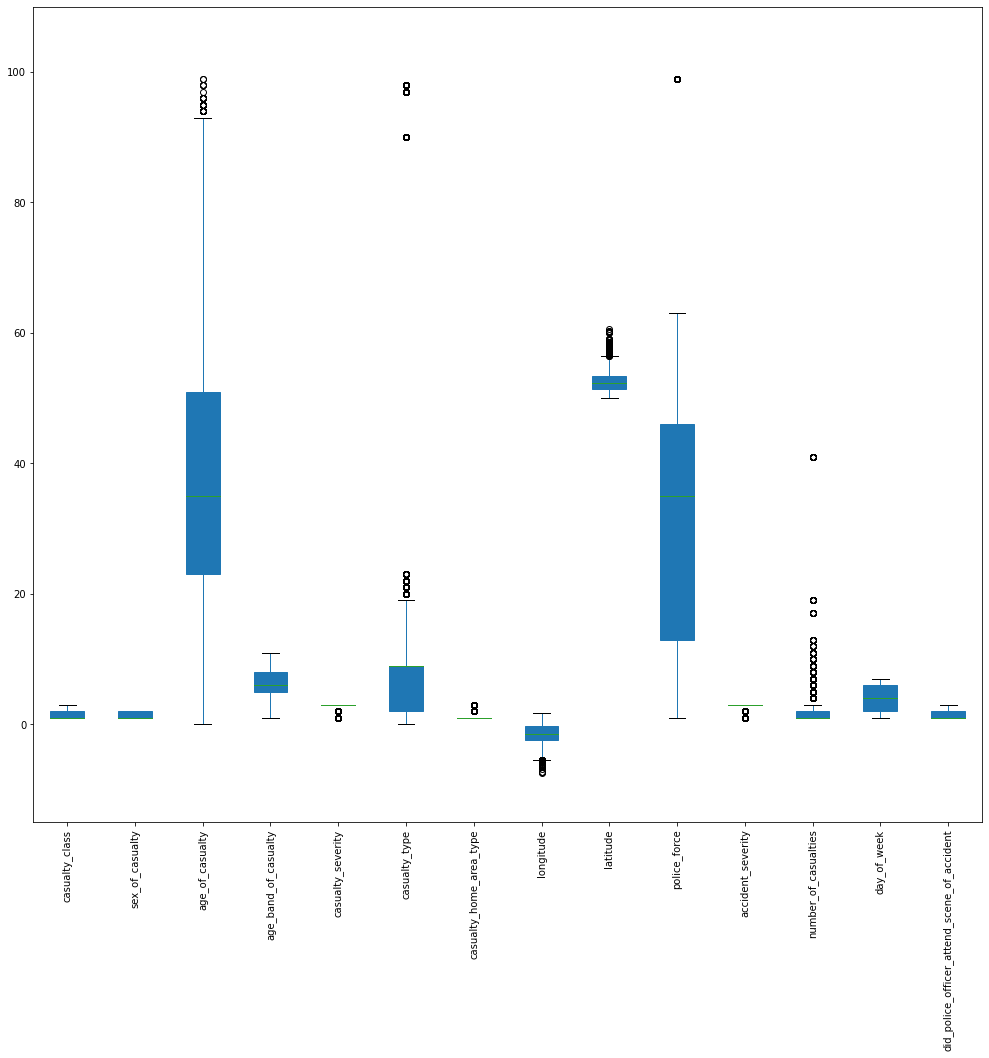

In [23]:
#plot a boxplot to visualize outliers
trainset.boxplot(figsize=(17, 15), grid=False, patch_artist=True)
plt.ylim(-15, 110)
plt.xticks(rotation='vertical')

Lets handle the outliers mainly in age_of_casualty and casualty_type columns

In [24]:
#find records that fall as outliers by calling the outlier_detect function
lowerbound_age, upperbound_age = outlier_detect(trainset.age_of_casualty)
lowerbound_casType, upperbound_casType = outlier_detect(trainset.casualty_type)

In [25]:
#remove outliers
trainset.drop(trainset[(trainset.age_of_casualty > upperbound_age) |
                       (trainset.age_of_casualty < lowerbound_age)].index,
              inplace=True)
trainset.drop(trainset[(trainset.casualty_type > upperbound_casType) |
                       (trainset.casualty_type < lowerbound_casType)].index,
              inplace=True)

In [26]:
trainset.head()

,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,casualty_type,casualty_home_area_type,longitude,latitude,police_force,accident_severity,number_of_casualties,date,day_of_week,time,did_police_officer_attend_scene_of_accident
14034,2,2,54,8,3,1,1,-2.284415,53.531991,6,3,1,18/05/2020,2,11:07,1
18919,1,2,18,4,3,9,1,-1.598269,54.892889,11,3,2,11/06/2020,5,16:53,2
80412,1,1,42,7,3,9,3,-5.228256,50.211542,50,3,2,23/09/2020,4,07:40,1
94734,1,1,35,6,3,19,1,-3.616745,55.081706,99,2,2,31/08/2020,2,16:18,1
39168,1,1,44,7,2,19,1,-1.610599,52.245520,23,2,1,30/09/2020,4,13:00,1


Outliers have been removed from age_of_casualty and casualty_type columns

# Step 5. Feature Engineering

### Categorize 'casualty_type' variable

In [27]:
'''classifying casualty_type into 5 main categories : pedestrian, 2 wheeler, 4 wheeler, 
multi axle and other'''


def convertToNewCategory(casualtyCode):
    dictCasualtyType = {
        9: "Four Wheeler",
        8: "Four Wheeler",
        109: "Four Wheeler",
        1: "Two Wheeler",
        2: "Two Wheeler",
        3: "Two Wheeler",
        4: "Two Wheeler",
        5: "Two Wheeler",
        22: "Two Wheeler",
        23: "Two Wheeler",
        97: "Two Wheeler",
        103: "Two Wheeler",
        104: "Two Wheeler",
        105: "Two Wheeler",
        106: "Two Wheeler",
        0: "Pedestrian",
        19: "Multi axle",
        11: "Multi axle",
        90: "Other",
        21: "Multi axle",
        20: "Multi axle",
        98: "Multi axle",
        10: "Multi axle",
        16: "Other",
        17: "Four Wheeler",
        18: "Multi axle",
        99: "Other",
        108: "Four Wheeler",
        110: "Multi axle",
        113: "Multi axle"
    }
    return dictCasualtyType[casualtyCode]


trainset["casualty_vehicle_category"] = trainset.apply(
    lambda x: convertToNewCategory(x["casualty_type"]), axis=1)
trainset.drop('casualty_type', axis=1, inplace=True)
trainset.head()

,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,casualty_home_area_type,longitude,latitude,police_force,accident_severity,number_of_casualties,date,day_of_week,time,did_police_officer_attend_scene_of_accident,casualty_vehicle_category
14034,2,2,54,8,3,1,-2.284415,53.531991,6,3,1,18/05/2020,2,11:07,1,Two Wheeler
18919,1,2,18,4,3,1,-1.598269,54.892889,11,3,2,11/06/2020,5,16:53,2,Four Wheeler
80412,1,1,42,7,3,3,-5.228256,50.211542,50,3,2,23/09/2020,4,07:40,1,Four Wheeler
94734,1,1,35,6,3,1,-3.616745,55.081706,99,2,2,31/08/2020,2,16:18,1,Multi axle
39168,1,1,44,7,2,1,-1.610599,52.245520,23,2,1,30/09/2020,4,13:00,1,Multi axle


In [28]:
#apply the function for testset too
testset["casualty_vehicle_category"] = testset.apply(
    lambda x: convertToNewCategory(x["casualty_type"]), axis=1)

testset.drop('casualty_type', axis=1, inplace=True)
testset.head()

,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,casualty_home_area_type,longitude,latitude,police_force,accident_severity,number_of_casualties,date,day_of_week,time,did_police_officer_attend_scene_of_accident,casualty_vehicle_category
28530,1,2,50,8,2,1,-0.330940,53.744729,16,2,1,14/09/2020,2,06:40,1,Two Wheeler
65202,1,1,26,6,2,3,-0.812116,51.092429,44,2,1,23/08/2020,1,14:36,2,Two Wheeler
44092,1,1,36,7,3,1,-0.571828,53.206321,32,3,3,28/04/2020,3,17:00,1,Four Wheeler
72877,1,2,60,9,3,1,0.588357,51.337145,46,3,3,27/09/2020,1,14:33,1,Four Wheeler
10004,1,1,26,6,2,3,-3.002490,53.367162,5,2,1,25/03/2020,4,19:02,1,Two Wheeler


The 'casualty_type' variable is classified into pedestrian, 2 wheeler, 4 wheeler, multi axle and other

### Data binning for 'time' variable

In [29]:
'''inorder to get a better look at the time of day when a casualty has most occured, 
data binning on 'time' column has been performed'''

#formatting
hours = pd.to_datetime(trainset['time'], format='%H:%M').dt.hour
'''bin time to Early Morning, Late Morning, Early Afternoon, Late Afternoon, Early Evening, 
Late Evening and Night'''
time_category = pd.cut(hours,
                       bins=[0, 4, 8, 11, 14, 17, 20, 24],
                       include_lowest=True,
                       labels=[
                           'Night', 'Early Morning', 'Late Morning',
                           'Early Afternoon', 'Late Afternoon',
                           'Early Evening', 'Late Evening'
                       ])
#insert new column
trainset.insert(15, 'time_category', time_category)

In [30]:
trainset['time_category'].value_counts()

Late Afternoon     17099
Early Afternoon    13072
Early Evening      11070
Late Morning        9707
Early Morning       8418
Late Evening        5388
Night               2648
Name: time_category, dtype: int64

In [31]:
#performing the same on testset

hours = pd.to_datetime(testset['time'], format='%H:%M').dt.hour
'''bin time to Early Morning, Late Morning, Early Afternoon, Late Afternoon, Early Evening, 
Late Evening and Night'''
time_category = pd.cut(hours,
                       bins=[0, 4, 8, 11, 14, 17, 20, 24],
                       include_lowest=True,
                       labels=[
                           'Night', 'Early Morning', 'Late Morning',
                           'Early Afternoon', 'Late Afternoon',
                           'Early Evening', 'Late Evening'
                       ])
#insert new column
testset.insert(15, 'time_category', time_category)

In [32]:
testset['time_category'].value_counts()

Late Afternoon     4254
Early Afternoon    3442
Early Evening      2847
Late Morning       2506
Early Morning      2119
Late Evening       1386
Night               689
Name: time_category, dtype: int64

Time has been binned into morning, afternoon, evening and night

### Data binning for 'age_band_of_casualty' variable

In [33]:
'''although the ages are grouped to age bands, having 11 types of 'age_band_of_casualty' 
isn't reasonable for analysis. Thus a more readable smaller grouping of 'age_of_casualty' 
continuous variable transformation to a categorical one, can be performed.The bins are :
0-5 as Infant/Toddler, 6-10 as Child, 11-20 as Teen, 21-35 as Young Adult, 36-65 as Adult 
& above 66 as Elderly'''

age_category = pd.cut(trainset.age_of_casualty,
                      bins=[0, 5, 10, 20, 35, 65, 99],
                      labels=[
                          'Infant/Toddler', 'Child', 'Teen', 'Young Adult',
                          'Adult', 'Elderly'
                      ])

#inserting a new column 'age_band_of_casualty_category' to display the categorical values
trainset.insert(4, 'age_band_of_casualty_category', age_category)

trainset.drop('age_band_of_casualty', axis=1, inplace=True)

In [34]:
trainset['age_band_of_casualty_category'].value_counts()

Adult             26327
Young Adult       21986
Teen              10219
Elderly            6176
Child              1622
Infant/Toddler      995
Name: age_band_of_casualty_category, dtype: int64

In [35]:
# performing the same on testset and check
age_category = pd.cut(testset.age_of_casualty,
                      bins=[0, 5, 10, 20, 35, 65, 99],
                      labels=[
                          'Infant/Toddler', 'Child', 'Teen', 'Young Adult',
                          'Adult', 'Elderly'
                      ])

#inserting a new column 'age_band_of_casualty_category' to display the categorical values
testset.insert(4, 'age_band_of_casualty_category', age_category)

testset.drop('age_band_of_casualty', axis=1, inplace=True)

In [36]:
testset['age_band_of_casualty_category'].value_counts()

Adult             6695
Young Adult       5693
Teen              2547
Elderly           1652
Child              391
Infant/Toddler     257
Name: age_band_of_casualty_category, dtype: int64

Age has been binned into Infant/Toddler, Child, Teen, Young Adult, Adult, Elderly

### Club 'police_force' to fewer categories

In [37]:
'''replacing police_forces other than Metropolitan Police(1), West Midlands(20) and 
Police Scotland(99) to take value 0'''

trainset['police_force'] = np.where(trainset['police_force'].between(3, 17), 0,
                                    trainset['police_force'])

trainset['police_force'] = np.where(trainset['police_force'].between(21, 98),
                                    0, trainset['police_force'])

trainset.value_counts('police_force')

police_force
0     56775
1      3608
20     3515
99     3504
dtype: int64

In [38]:
#perform the same to testset
testset['police_force'] = np.where(testset['police_force'].between(3, 17), 0,
                                   testset['police_force'])

testset['police_force'] = np.where(testset['police_force'].between(21, 98), 0,
                                   testset['police_force'])

testset.value_counts('police_force')

police_force
0     14527
1       974
20      900
99      842
dtype: int64

All police force other than the metropolitan, west midlands and scoland have been grouped under 'Others'

### Create 'Month' feature from Date variable

In [39]:
#Creating column month to hold the value of month from the date variable.
trainset['month'] = pd.DatetimeIndex(trainset['date']).month
trainset.month.value_counts()

testset['month'] = pd.DatetimeIndex(testset['date']).month

dictNumberToMonthNameMapper = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

# Data Visualization

### Change numberical values of Categorical variables to appropriate values for visualization

In [40]:
'''replacing the categorical variables with proper values to make encoding of categorical 
variables much easier during modelling'''

trainset['casualty_class'].replace(
    [1, 2, 3], ['Driver or Rider', 'Passenger', 'Pedestrian'], inplace=True)

trainset['sex_of_casualty'].replace([1, 2], ['Male', 'Female'], inplace=True)

trainset['casualty_severity'].replace([1, 2, 3],
                                      ['Fatal', 'Serious', 'Slight'],
                                      inplace=True)

trainset['casualty_home_area_type'].replace(
    [1, 2, 3], ['Urban Area', 'Small Town', 'Rural'], inplace=True)

trainset['police_force'].replace([1, 20, 99, 0], [
    'Metropolitan Police', 'West Midlands', 'Scotland Police',
    'Other Police Force'
],
                                 inplace=True)
trainset['accident_severity'].replace(
    [1, 2, 3], ['Fatal Accident', 'Serious Accident', 'Slight Accident'],
    inplace=True)

trainset['day_of_week'].replace([1, 2, 3, 4, 5, 6, 7], [
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday'
],
                                inplace=True)
trainset['did_police_officer_attend_scene_of_accident'].replace(
    [1, 2, 3], ['Yes', 'No', 'No'], inplace=True)

trainset.head()

,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty_category,casualty_severity,casualty_home_area_type,longitude,latitude,police_force,accident_severity,number_of_casualties,date,day_of_week,time,did_police_officer_attend_scene_of_accident,time_category,casualty_vehicle_category,month
14034,Passenger,Female,54,Adult,Slight,Urban Area,-2.284415,53.531991,Other Police Force,Slight Accident,1,18/05/2020,Monday,11:07,Yes,Late Morning,Two Wheeler,5
18919,Driver or Rider,Female,18,Teen,Slight,Urban Area,-1.598269,54.892889,Other Police Force,Slight Accident,2,11/06/2020,Thursday,16:53,No,Late Afternoon,Four Wheeler,11
80412,Driver or Rider,Male,42,Adult,Slight,Rural,-5.228256,50.211542,Other Police Force,Slight Accident,2,23/09/2020,Wednesday,07:40,Yes,Early Morning,Four Wheeler,9
94734,Driver or Rider,Male,35,Young Adult,Slight,Urban Area,-3.616745,55.081706,Scotland Police,Serious Accident,2,31/08/2020,Monday,16:18,Yes,Late Afternoon,Multi axle,8
39168,Driver or Rider,Male,44,Adult,Serious,Urban Area,-1.610599,52.245520,Other Police Force,Serious Accident,1,30/09/2020,Wednesday,13:00,Yes,Early Afternoon,Multi axle,9


In [41]:
#doing the same on the testset for proper encoding of categorical variables
testset['casualty_class'].replace(
    [1, 2, 3], ['Driver or Rider', 'Passenger', 'Pedestrian'], inplace=True)

testset['sex_of_casualty'].replace([1, 2], ['Male', 'Female'], inplace=True)

testset['casualty_severity'].replace([1, 2, 3], ['Fatal', 'Serious', 'Slight'],
                                     inplace=True)

testset['casualty_home_area_type'].replace(
    [1, 2, 3], ['Urban Area', 'Small Town', 'Rural'], inplace=True)

testset['police_force'].replace([1, 20, 99, 0], [
    'Metropolitan Police', 'West Midlands', 'Scotland Police',
    'Other Police Force'
],
                                inplace=True)

testset['accident_severity'].replace(
    [1, 2, 3], ['Fatal Accident', 'Serious Accident', 'Slight Accident'],
    inplace=True)

testset['day_of_week'].replace([1, 2, 3, 4, 5, 6, 7], [
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday'
],
                               inplace=True)

testset['did_police_officer_attend_scene_of_accident'].replace(
    [1, 2, 3], ['Yes', 'No', 'No'], inplace=True)

#### Proportion of casualties across home area type

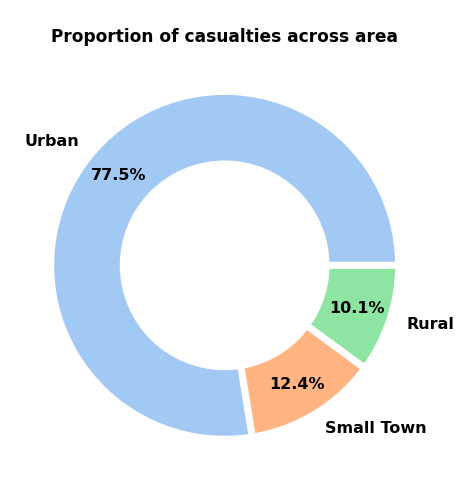

In [42]:
#visualise the proportion of casualties across home area type
urban = trainset.casualty_home_area_type.value_counts()[0]
smalltown = trainset.casualty_home_area_type.value_counts()[1]
rural = trainset.casualty_home_area_type.value_counts()[2]

names = ['Urban', 'Small Town', 'Rural']
size = [urban, smalltown, rural]

colors = sns.color_palette('pastel')[0:5]
#create a pie chart
plt.pie(x=size,
        labels=names,
        colors=colors,
        autopct='%1.1f%%',
        pctdistance=0.8,
        textprops=dict(fontweight='bold', fontsize=16),
        wedgeprops={
            'linewidth': 7,
            'edgecolor': 'white'
        })

#convert it to a donut chart with a circle at the centre
circ = plt.Circle((0, 0), 0.6, color='white')

fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.gca().add_artist(circ)
plt.title('\nProportion of casualties across area',
          fontsize=17,
          fontweight='bold')

plt.show()

Urban areas have seen the worst cases of casualty cases. Small towns and rural areas seem to be relatively safer.

#### Most impacted gender

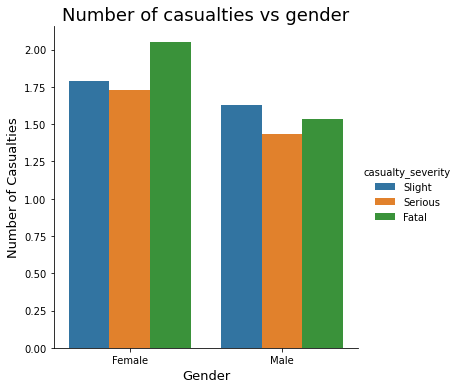

In [43]:
#plot visualization of victim gender against number of casualties based on casualty severity
ax = sns.catplot(x="sex_of_casualty",
                 y="number_of_casualties",
                 hue="casualty_severity",
                 kind="bar",
                 data=trainset,
                 ci=None)

configureGraph(ax, plt, "Gender", 13, "Number of Casualties", 13, False,
               "Number of casualties vs gender", 18)

Females have been the major victims of fatal cases!

#### Daily cases

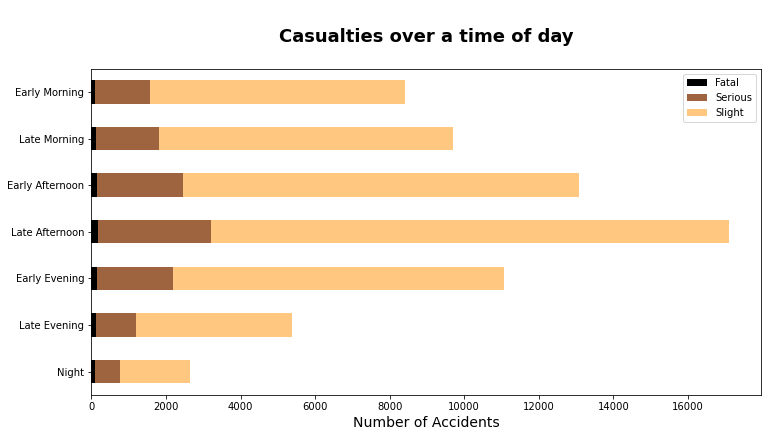

In [44]:
# visualise casualty over time category

#Creating labels
times = [
    'Early Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon',
    'Early Evening', 'Late Evening', 'Night'
]

acc_sev_time = trainset.groupby(['time_category', 'casualty_severity']).size()

counts = acc_sev_time.rename_axis(['time_category', 'casualty_severity'])\
                                .unstack('casualty_severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'},
                                        axis='columns')

# plot barplot
fig, ax = plt.subplots(figsize=(12, 6))

counts.reindex(times).plot(kind='barh', ax=ax, stacked=True, cmap='copper')
ax.set_title('\nCasualties over a time of day\n',
             fontsize=18,
             fontweight='bold')
#ax.set(xlabel='Number of Accidents', ylabel='', fontsize = 13)

ax.set_xlabel('Number of Accidents', size=14)
ax.set_ylabel('')

ax.invert_yaxis()

ax.legend(loc='upper right')

Most of the casualty cases have occured during late afternoon hours of 3PM to 6PM!

#### Weekly cases

In [45]:
#Total cases per day
totalCasesPerDay = trainset.groupby("day_of_week")["casualty_severity"].count(
).reset_index().rename(columns={"casualty_severity": "count"})

print(totalCasesPerDay)

  day_of_week  count
0      Friday  10875
1      Monday   9407
2    Saturday   9426
3      Sunday   8014
4    Thursday  10179
5     Tuesday   9654
6   Wednesday   9847


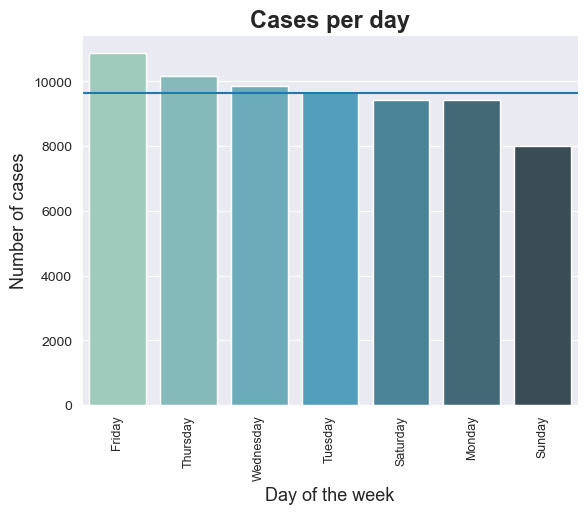

In [46]:
sns.reset_defaults()
sns.set_style('darkgrid')

#Potting the total cases per day basis

totalCasesPerDay = totalCasesPerDay.sort_values("count", ascending=False)
meanNumberOfCases = totalCasesPerDay["count"].mean()
ax = sns.barplot(x="day_of_week",
                 y="count",
                 data=totalCasesPerDay,
                 ci=None,
                 palette="GnBu_d")
ax.axhline(meanNumberOfCases)
configureGraph(ax, plt, "Day of the week", 13, "Number of cases", 13, False,
               "Cases per day", 17)

plt.rcParams['figure.figsize'] = (6, 7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(fontsize=9)

plt.show()

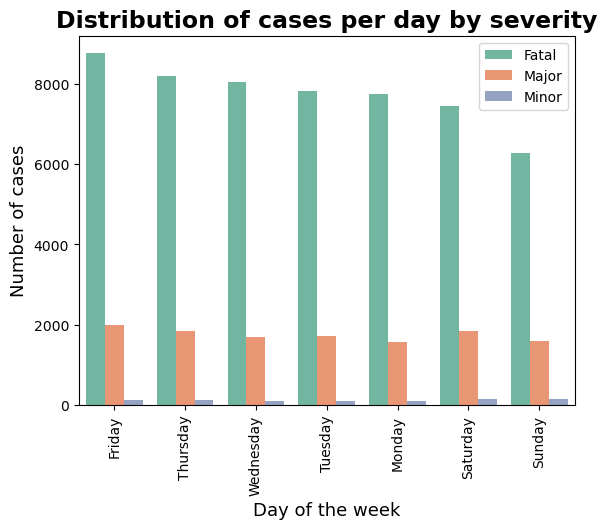

In [47]:
sns.reset_defaults()

#Getting the count for each severity per day

incidentsCountPerDayBySeverity = trainset.groupby([
    "day_of_week", "casualty_severity"
]).size().reset_index().rename(columns={
    0: "num_of_cases",
    "count": "casualty_severity"
})

incidentsCountPerDayBySeverity
incidentsCountPerDayBySeverity = incidentsCountPerDayBySeverity.sort_values(
    "num_of_cases", ascending=False)

#Plotting cases by severity and day of the week
ax = sns.barplot(x="day_of_week",
                 y="num_of_cases",
                 hue="casualty_severity",
                 data=incidentsCountPerDayBySeverity,
                 ci=None,
                 palette="Set2")
configureGraph(ax, plt, "Day of the week", 13, "Number of cases", 13, False,
               "Distribution of cases per day by severity", 17)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

labels = ['Fatal', 'Major', 'Minor']
ax.legend(loc='upper right', labels=labels)
plt.show()

Most accidents have occured during the end of the week i.e on Friday! 

#### Monthly cases in year 2020

In [48]:
#number of cases per month over time for 2020.
casualtySeverityCountByMonth = trainset.groupby(
    "month")["casualty_severity"].count().reset_index()

casualtySeverityCountByMonth["month"] = casualtySeverityCountByMonth[
    "month"].map(lambda x: dictNumberToMonthNameMapper.get(x)
                 if x in dictNumberToMonthNameMapper else x)
casualtySeverityCountByMonth

,month,casualty_severity
0,January,6859
1,February,5879
2,March,4270
3,April,3779
4,May,4774
5,June,5435
6,July,5756
7,August,5863
8,September,6049
9,October,6661


In [49]:
# lets plot an interactive visualization
# Make DataFrame Pipeline Interactive
idf = trainset.interactive()

# Define Panel widgets
month_slider = pn.widgets.IntSlider(name='Accident Month',
                                    start=1,
                                    end=12,
                                    step=1,
                                    value=1)

# Radio buttons for number of casualities measures
yaxis_noOfCas = pn.widgets.RadioButtonGroup(name='Y axis',
                                            options=['number_of_casualties'],
                                            button_type='success')
'''set the pipeline to take the number of casualties based on accident_person_type for 
each month'''
accident_person_type = ['Driver or Rider', 'Passenger', 'Pedestrian']

acc_pipeline = (
    idf[(idf.month <= month_slider)
        & (idf.casualty_class.isin(accident_person_type))].groupby([
            'casualty_class', 'month'
        ])[yaxis_noOfCas].sum().to_frame().reset_index().sort_values(
            by='month').reset_index(drop=True))

In [50]:
# plot visualisation of months against number of casualties based on the casualty class
acc_plot = acc_pipeline.hvplot(x='month',
                               by='casualty_class',
                               y=yaxis_noOfCas,
                               line_width=3,
                               title="Accidents over time")
acc_plot

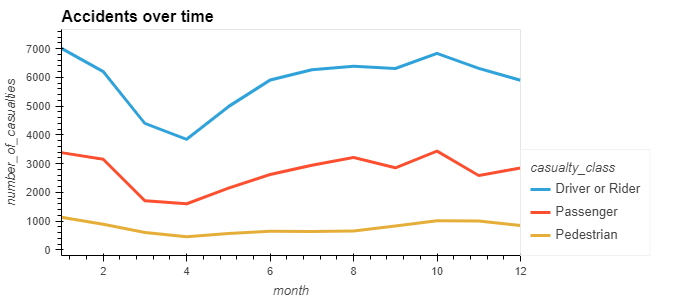

# Step 6. Export the train and test data sets

In [51]:
fileNameTrainset = 'trainset.csv'
fileNameTestset = "testset.csv"

# saving the excel
trainset.to_csv(fileNameTrainset, index=False)
testset.to_csv(fileNameTestset, index=False)

The training and test set are exported and are ready for further modelling

# Conclusion

This notebook is our take on exploring the road casualty and accident dataset provided in the UK government portal. We were able to observe some very interesting facts that would be useful for the A&E department to take into note for better utilisation of their resources.

The following were our observations:
* Although adult men have been major victims of accidents, the fatality rate has been higher for women. 
* The department can expect the most cases to happen on friday late afternoon, around 3PM to 6PM (rush hours after work week)
* Most casualty patients drivers/riders of a vehicle
* There seems to be a sudden rise in casualty cases particularly in the months of September to November. April seems to be the safest month of all.
* Metropolitan region seem to incur frequel accidents